## This is the 2-layer neural network notebook for ECE C147/C247 Homework #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the notebook entirely when completed.

The goal of this notebook is to give you experience with training a two layer neural network.

In [1]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass. Make sure to read the description of TwoLayerNet class in neural_net.py file , understand the architecture and initializations

In [2]:
from nndl.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [4]:
## Implement the forward pass of the neural network.
## See the loss() method in TwoLayerNet class for the same

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.3812311957259755e-08


### Forward pass loss

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [6]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 2.9632256572661646e-10
b2 max relative error: 1.8392017135950213e-10
W1 max relative error: 1.28328951808708e-09
b1 max relative error: 3.172680285697327e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.014497864587765986


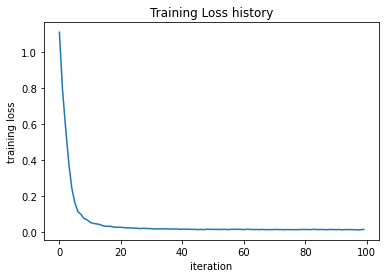

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [8]:
from utils.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'C:/Users/Lennox/Desktop/UCLA Courses/ECE247\HW\HW2\hw2_Questions/code/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302757518613176
iteration 100 / 1000: loss 2.302120159207236
iteration 200 / 1000: loss 2.2956136007408703
iteration 300 / 1000: loss 2.2518259043164135
iteration 400 / 1000: loss 2.188995235046776
iteration 500 / 1000: loss 2.1162527791897747
iteration 600 / 1000: loss 2.064670827698217
iteration 700 / 1000: loss 1.9901688623083937
iteration 800 / 1000: loss 2.002827640124685
iteration 900 / 1000: loss 1.94651768178565
Validation accuracy:  0.283


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [10]:
stats['train_acc_history']

[0.095, 0.15, 0.25, 0.25, 0.315]

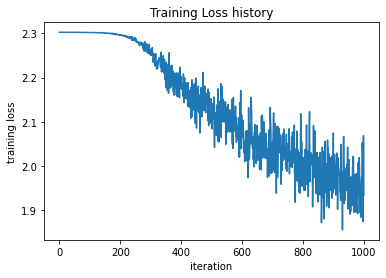

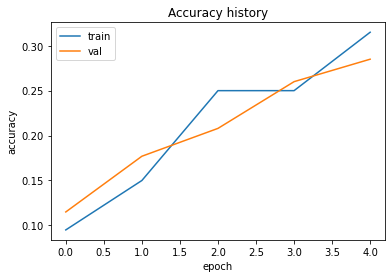

In [11]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies

plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

plt.plot(stats['train_acc_history'],label='train')
plt.plot(stats['val_acc_history'],label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy history')
plt.show()
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) It can be seen from the graphs that the training loss decreases slowly with fluctuation. Both the train and validation accuracy keep increase. The model suffers from underfiting problem.

(2) Considering the validation accuracy hasn't reached its peak, the model has not reached overfitting, which means we can further train the model by improving iterations. Also we can try different batch sizes and regularization coefficients. As for the decreasing of the training loss, it's reasonable to try some other learning rates since the loss decreases unstablely.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [12]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

#learning rates
learning_rate = [1e-6*(10**x) for x in range(4)]
lr_acc =[]
for lr in learning_rate:
    _ = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=0.25, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    lr_acc.append(val_acc)
best_lr = learning_rate[np.argmax(lr_acc)]
print('best learning rate:',best_lr,' acc:',np.max(lr_acc))

#batch size
batch_sizes = [100*(x+1) for x in range(5)]
batch_acc =[]
for batch_size in batch_sizes:
    _ = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=batch_size,
            learning_rate=best_lr, learning_rate_decay=0.95,
            reg=0.25, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    batch_acc.append(val_acc)
best_batch = batch_sizes[np.argmax(batch_acc)]
print('best batch size:',best_batch,' acc:',np.max(batch_acc))

#iterations
num_iters = [1000+(x+1)*200 for x in range(4)]
iter_acc =[]
for it in num_iters:
    _ = net.train(X_train, y_train, X_val, y_val,
            num_iters=it, batch_size=best_batch,
            learning_rate=best_lr, learning_rate_decay=0.95,
            reg=0.25, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    iter_acc.append(val_acc)
best_iter = num_iters[np.argmax(iter_acc)]+2000
print('best number of iters:',best_iter,' acc:',np.max(iter_acc))

best_net = TwoLayerNet(input_size, hidden_size, num_classes)
_ = best_net.train(X_train, y_train, X_val, y_val,
            num_iters=best_iter, batch_size=best_batch,
            learning_rate=best_lr, learning_rate_decay=0.95,
            reg=0.25, verbose=False)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

best learning rate: 0.001  acc: 0.464
best batch size: 500  acc: 0.52
best number of iters: 3200  acc: 0.532
Validation accuracy:  0.519


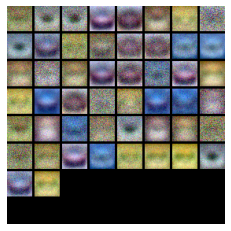

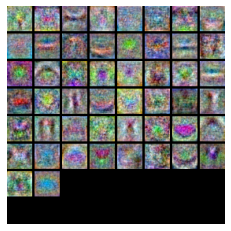

In [13]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) Compared with weights of the suboptimal net, the weights of the best net are more recognizable, especially in terms of shapes and colors. 

## Evaluate on test set 

In [14]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.507
